In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt




In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#tobs means temperatures in degrees F
june_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6)                                                                     

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june_temps)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps,columns=['date','June Temps'])
june_temps_df.set_index(june_temps_df['date'], inplace=True)
print(june_temps_df)

                  date  June Temps
date                              
2010-06-01  2010-06-01        78.0
2010-06-02  2010-06-02        76.0
2010-06-03  2010-06-03        78.0
2010-06-04  2010-06-04        76.0
2010-06-05  2010-06-05        77.0
...                ...         ...
2017-06-26  2017-06-26        79.0
2017-06-27  2017-06-27        74.0
2017-06-28  2017-06-28        74.0
2017-06-29  2017-06-29        76.0
2017-06-30  2017-06-30        75.0

[1700 rows x 2 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12)  

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps,columns=['date','December Temps'])
dec_temps_df.set_index(dec_temps_df['date'], inplace=True)

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
june_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month',Measurement.date) ==6).all()

In [13]:
june_prcp_df = pd.DataFrame(june_prcp,columns=['date','June prcp'])
june_prcp_df.set_index(june_prcp_df['date'], inplace=True)
june_prcp_df.describe()

,June prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [14]:
dec_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month',Measurement.date) ==12).all()

In [15]:
dec_prcp_df = pd.DataFrame(dec_prcp,columns=['date','December prcp'])
dec_prcp_df.set_index(dec_prcp_df['date'], inplace=True)
dec_prcp_df.describe()

,December prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


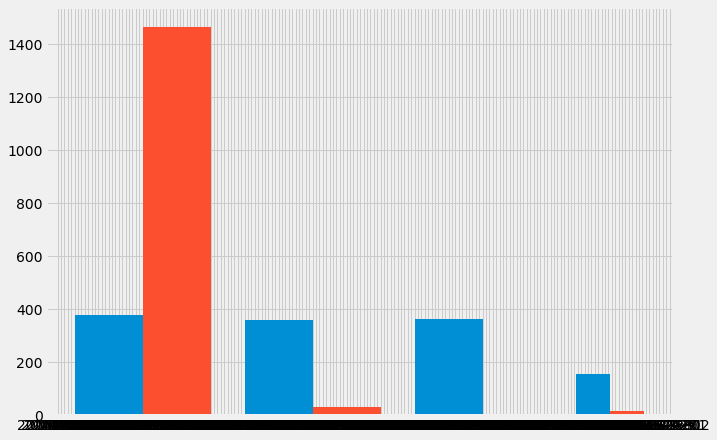

In [21]:
#dec_prcp_df.plot.hist(bins=550)
#plt.tight_layout()
fig, ax = plt.subplots(figsize =(10, 7,))
ax.hist(dec_prcp_df, bins = [0, 50, 100, 150, 175])
plt. show()

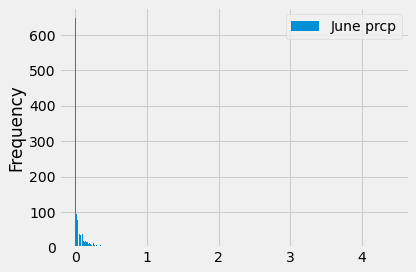

In [17]:
june_prcp_df.plot.hist(bins=550)
plt.tight_layout()